In [7]:
# Adopt rfpimp to compute feature importance in sklearn RF using permutation importance to increase reliability 

In [8]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [9]:
#every time we are saving a csv, dtypes are lost by default. Define the following read and write function to preserve converted types in the first row to avoid another conversion after every new load.

import os
import json

def to_csv(df, path):
    
    dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
    jtypes = json.dumps(dtypes)

    fileName = os.path.splitext(path)

    # save df as usual along with a json representation of the dictionary
    df.to_csv(path, index=False)

    f = open(fileName[0]+'Types',"w")
    f.write(jtypes)
    f.close()

    # free memory
    gc.enable()
    del df
    gc.collect()

def read_csv(path):
    
    fileName = os.path.splitext(path)
    
    jtypes = json.load(open(fileName[0]+'Types'))
    
    return pd.read_csv(path, dtype=jtypes)

def read_csvTmp(path):
    
    fileName = os.path.splitext(path)
    
    jtypes = json.load(open(fileName[0]+'Types'))
    
    return pd.read_csv(path, dtype=jtypes, nrows=10000)

In [10]:
train = read_csv('../../data/trainjoincoll.csv')

In [11]:
train.shape

(307511, 562)

In [12]:
train.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [13]:
train.shape

(307511, 561)

In [14]:
train, test = train_test_split(train, test_size=0.25)

In [15]:
trainX, trainY = train.drop('TARGET', axis=1), train['TARGET']
testX, testY = test.drop('TARGET', axis=1), test['TARGET']

In [16]:
# add a randomic feature
trainX['random'] = np.random.random(size=len(trainX))
testX['random'] = np.random.random(size=len(testX))

In [17]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(trainX, trainY)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
%time imp = importances(rf, testX, testY) # permutation


CPU times: user 10min 2s, sys: 10.2 s, total: 10min 12s
Wall time: 1min 52s


/home/arbiterelegantiae/anaconda3/lib/python3.7/site-packages/rfpimp.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


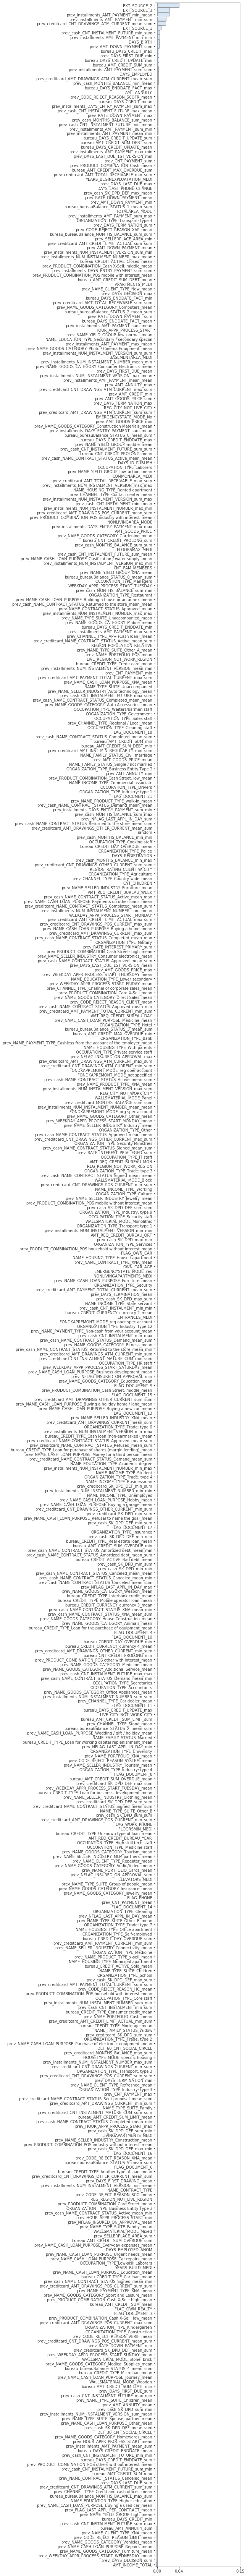

In [19]:
viz = plot_importances(imp)
viz.view()

In [20]:
imp.to_csv('../../data/featimp.csv')

In [21]:
imp.head()

,Importance
Feature,
EXT_SOURCE_2,0.039395
EXT_SOURCE_3,0.022508
prev_installments_AMT_PAYMENT_min_mean,0.021320
prev_installments_AMT_PAYMENT_min_sum,0.016274
prev_creditcard_CNT_DRAWINGS_ATM_CURRENT_mean_sum,0.015063
